# 10 Essential statistical concepts every data scientist must know

<img src='statsfordatascience.png' alt='cover Image' width='500' height='300'>

<!--- ![Cover Image](statsfordatascience.png)

## Introduction
Data is to data scientist what a raw block of marble is to marble sculptors. Along with sculptors, data scientist need appropriate tools and techniques to draw useful insights from data. Statistics is one of the most powerful toolkit every data scientist should have in their arsenal. Without an adequate level of statistics knowledge, it would be extremely hard if not impossible to interpret, understand and explain the data. Furthermore, machine leaning which helps data scientist to infer and predict the behavior of data highly leans on statistics. It is therefore absolutely necessary to learn statistics and most of its concepts for any aspiring data scientist. 

In this article I will try to explain and illustrate with python code 10 statistical concepts every data scientist must know. Before diving into the subject, let's import necessary libraries and modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sympy.stats import E
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

### 1. Population and Sample

Generally speaking, a **population** is the set of people living in a given area at a particular time. However in statistics, A **population** is the entire set of from which we draw data for a statistical study. It can be a set of items, individuals, animals, etc.

Contrarily to a population, a **sample** represents the subset of the population on which the study is being carried out. Moreover, a sample is said to be **representative of the population** if all the unique elements of the population are represented in that sample, otherwise the results obtained from the sample will be wrongly extrapolated to the population. 
For example let's consider a population of $10000$ pieces of clothes including the following items **t-shirt, sleeveless, sweat, pull-over, pants, trousers, dress, jacket, nightdress, underwear** from which we randomly draw a sample of size $1000$. 

In [2]:
items = ['t-shirt', 'sleeveless', 'sweat', 'pull-over', 'pants',
'trousers', 'dress', 'jacket', 'nightdress', 'underwear']
pop = np.random.choice(items, size=10000, replace=True)
samp = np.random.choice(pop, 1000)

labels, pop_counts = np.unique(pop, return_counts=True)
_, samp_counts = np.unique(samp, return_counts=True)

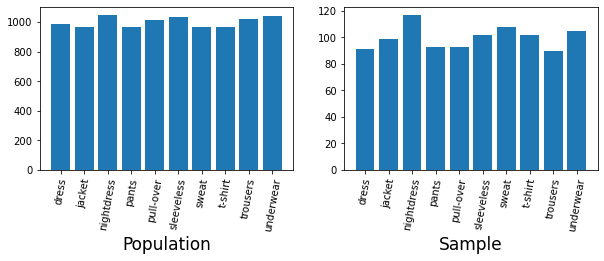

In [3]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(10,3))
ax1, ax2 = axs[0], axs[1]
fontdict = {'fontsize':17}
ax1.bar(labels, pop_counts, align='center')
ax1.set_xticklabels(labels, rotation=80)
ax1.set_xlabel('Population', fontdict=fontdict)
ax2.bar(labels, samp_counts, align='center')
ax2.set_xticklabels(labels, rotation=80)
ax2.set_xlabel('Sample', fontdict=fontdict)
plt.show()

We notice that all the items of the population are represented in the sample and the distribution of the sample is not that different from that of the population.

### 2. Probability distributions
In probability theory,  a **probability distribution** is a mathematical function that gives the probabilities of different possible outcomes for an experiment. In statistics, it is a mathematical description of a random phenomenon in terms of its sample space and the probabilities of events (subsets of the sample space). 

In the example of clothes, the probability of each type of clothes is the number of pieces of this given divided by the total number of clothes (the size of the population). Let's calculate and visualize the probability distribution of our population.  

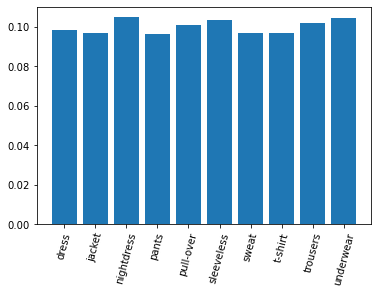

In [4]:
probs = pop_counts/np.sum(pop_counts)
plt.bar(labels, probs)
plt.xticks(rotation=75)
plt.show()

We get back the bar chart of the distribution of the population at a different scale (0 - 1). We also notice that every type of clothe has almost the same probability: our population follows a **uniform distribution**. Following the type of random variable (continuous or discrete) there exist several probability distributions (with their PDFs shown on the figure below) among which the **normal distribution** or **bell curve** is the most commonly used. 

<img src = 'distribution.png' alt='Distributions' width='500' height='800'>

### 3. Normal distribution
In statistics, a **Normal distribution**, also known as **Gaussian, Gauss** or **Laplace-Gauss distribution** is a probability distribution used to model phenomena that have a default behavior and cumulative possible deviations from that behavior. This is a continuous probability distribution for real valued random variables. 

The general form of the probability density function for a normal distributed continuous random variable X is as follows:
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma^2}\right)^2}$$

Where $\mu$ and $\sigma$ represent the **mean** and **standard deviation** of the population respectively.

The following figure better illustrates the typical bell shape of the probability density function of a normally distributed random variable with $mean = 0$ and $std = 1$.

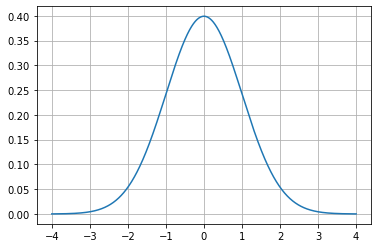

In [5]:
def norm(x, mean, std):
    f = np.exp(-0.5 * ((x - mean)/std**2)**2) /(std * (np.sqrt(2*np.pi)))
    return f

x = np.linspace(-4, 4, 1000)
y = [norm(i, 0, 1) for i in x]
plt.plot(x,y)
plt.grid()
plt.show()

We notice that the mean is the most likely value of the sample (p = 0.4) and the probability of the other values are symmetrically distributed around the mean. The next figure gives more details about the normal distribution. Here the percentages represent the portion of data that falls in the given interval. We observe that 99.73% of the data falls within $\mu - 3\sigma$ and $\mu + 3\sigma$.


<img src = 'normal_dist.png' alt='Normal' height='200' width='400'>

### 4. Measures of central tendency
Central tendency designates the central value(s) of a probability distribution. The most commonly used central values are mean, median and mode.
- The **mean** is the average value of the sample. It is used only for quantitative values.
$$mean = \frac{1}{n}\sum\limits_{i = 1}^{n}x_i$$
- The **median** is the value that divides the sample into two equal parts. In other words, it is the values that appears in the middle of the sample when it is sorted either in ascending or descending order.
- The **mode** is the value with the highest frequency of appearance in the sample.

In [6]:
print(f'mean = {np.mean(pop_counts)}')
print(f'median = {np.median(pop_counts)}')

mean = 1000.0
median = 997.0


### 5. Measures of dispersion
The measures of central tendency are not enough to describe the summary statistics of a dataset. Measures of dispersion tell us all we need to know about the extent of variability of the data. The three commonly used are **Standard deviation, inter-quartile range** and **range**.

- **Range** is the difference between the largest and the smallest observations of the data. The only advantage of this measure is the ease of evaluation. unfortunately, it is highly sensitive to outliers and does not take into account all the observations of the data. It is much more convenient to provide the largest and the smallest values of a dataset instead of the range.
- **inter-quartile range or IQR for short** is the difference between the $25^{th}$ and the $75^{th}$ percentiles of the data, also known as the **first** and **third** percentiles, being the $50\%$ middle observations of the data.
- **Standard deviation (std)** is the most commonly used measure of dispersion. It measures the spread of data about the mean. Mathematically, standard deviation is the square root of sum of squared deviation from the mean divided by the number of observations. 
$$std = \sqrt{\frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2}{n}}$$
This formulae is a faithful translation of the definition of standard deviation. For calculations, the following simpler formulae is adopted.
$$std = \sqrt{\frac{\sum\limits_{i=1}^{n}x_i^2 - \frac{(\sum\limits_{i=1}^{n}x_i)^2}{n}}{n}}$$
*Note : In practice, the denominator **n** is replaced by **n-1** for a better accuracy of the estimation of the standard deviation*.  

In [7]:
print(f'std = {np.std(pop_counts):.2f}')
print(f'IQR = {stats.iqr(pop_counts)}')
print(f'range = {np.max(pop_counts) - np.min(pop_counts)}')

std = 32.39
IQR = 60.75
range = 86


### 6. Expected value of a random variable
The **expected value** of a random variable **X**, noted **E[X]** is the weighted sum of all possible values of this variable. The weights here are the probabilities of these passible values. For discrete random variables, the discrete sum is used and for continuous random variables, the integral is used. 
##### Expected value of a discrete random variable X
The formulae is given by:
$$E[X] = \sum\limits_{i=1}^{n} x_ip(x_i)$$

With:
- $x_i$ the possible value of the random variable X
- $p(x_i)$ the probability that $X = x_i$.

##### Expected value of a continuous random variable X
Here the probability density function (PDF) $f(x)$ is used to evaluate the probability of X being equal to x and the formulae is the following:

$$E[X] = \int\limits_{-\infty}^{\infty} xf(x)dx$$
Let's consider the random variable X defined above. X is a clothe, the expected value of X the sum of different kinds of clothes times their probabilities.

In [8]:
print(f'E = {np.sum(pop_counts*probs):.2f}')

E = 1001.05


### 7. Linear regression
In statistics, **linear regression** is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). More specifically, Linear regression refers to the case of a single independent variable, the case of multiple independent variables being known as **Multiple linear regression**. Furthermore, for the sake of better clarification, Multiple linear regression differs from **multivariate linear regression** in that the later refers to the prediction of multiple correlated dependent variables. 
#### 7.1. Mathematical formulation
Let $\{y_i, x_{i1}, x_{i2}, \ldots, x_{ip}\}_{i=1}^{n}$ be the set of n statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and the p-vector of regressors $x$ is **linear** and takes the form:

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \varepsilon_i = x_i^T\beta + \varepsilon_i \qquad i = 1, \ldots, n$

$\\varepsilon$ is the **disturbance term** or **error variable**. 

In matrix notation, the above equation takes the following form:

$y = X\beta + \varepsilon$ where $y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{pmatrix}$, $X = \begin{pmatrix} x_1^T \\ x_2^T \\ \vdots \\ x_n^T\end{pmatrix} = \begin{pmatrix} 1 & x_{11} & \ldots & x_{1p} \\ 1 & x_{21} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \ldots & x_{np} \\\end{pmatrix}$, $\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_n\end{pmatrix}$, $\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n\end{pmatrix}$

#### 7.2. Example
We will create a randomly distributed dataset $x$ for which we will find the best linear model $y$ describing $x$, that is find the values of the **slope** $\beta_1$ and the **intercept** $\beta_0$ such that $y = \beta_0 + \beta_1x$.

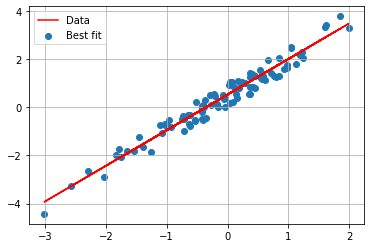

In [44]:
x = np.random.randn(100)
y = 1.5*x + np.random.default_rng().random(100)
res = stats.linregress(x, y)
y_hat = res.intercept + res.slope*x
plt.plot(x, y_hat, label='Data', color='red')
plt.scatter(x, y, label='Best fit')
plt.grid()
plt.legend()
plt.show()

### 8. Over sampling and under sampling
Some datasets are unbalanced that is the amount of data of one category is highly greater than the other. this is sometimes the case in some classification problems. For example we might have to classify emails either as **spam** or **not spam (or safe)** and the training data contains **90%** of **safe emails** and **10%** of **spams**. 
<img src = 'sampling.png' alt='Over Sampling Under Sampling'>

Oversampling means we multiply the minority class such that it has the same count as the majority class. Now we have leveled out our dataset and the distribution of minorities without additional data.

Under-sampling means we select only some data from the majority class, as the same number of the minority classes. Now we have a balance on the probability distribution of the classes.

### 9. Probability
**Probability** is the measure of the likelihood of an event to occur in a Random Experiment. Mathematically, for a  random experiment with a discrete outcome, the probability of an event is frequency of this event divided by the total number of events in the experiment.

#### Terminology
- $\Omega$ represent the universe, that is the set of all possible outcomes of the experiment.
$P(\Omega) = 1$

For illustration purposes, we will consider the random experiment **Rolling a dice** and calculate the probabilities of few possible outcomes. Whatever the outcome, it is an integer that falls between 1 and 6, included.

In this case, $\Omega = \{1,2,3,4,5,6\}$. 

Consider the following events:
- A : "Roll a 3"
- B : "Roll an even digit"
- C : "Roll a digit les than or equal to 4"
- D : "Roll an odd digit greater tha 2"
- E : "Roll 7"

In [50]:
omega = {1,2,3,4,5,6}
A = {3}
B = {2,4,6}
C = {1,2,3,4}
D = {3,5}
E = {}
print(f'P(A) = {len(A)}/{len(omega)}\nP(B) = {len(B)}/{len(omega)}\n\
P(C) = {len(C)}/{len(omega)}\nP(D) = {len(D)}/{len(omega)}\nP(E) = {len(E)/len(omega)}\n')

P(A) = 1/6
P(B) = 3/6
P(C) = 4/6
P(D) = 2/6
P(E) = 0.0



### 10. Combinations and Permutations
Combinations and permutations are two slightly different ways to select objects from a set to form a subset. Permutations take into consideration the order of the subset, whereas combinations do not.

#### 10.1. Permutations
A permutation of n elements is any arrangement of those n elements in a definite order. There are n factorial (n!) ways to arrange n elements. Note the bold: order matters!
The number of permutations of n things taken r-at-a-time is defined as the number of r-tuples that can be taken from n different elements and is equal to the following equation:
$$P_{n,r} = \frac{n!}{(n-r)!}$$

#### 10.2. Combinations
The number of ways to choose r out of n objects where order doesn’t matter.
The number of combinations of n things taken r-at-a-time is defined as the number of subsets with r elements of a set with n elements and is equal to the following equation:
$$C^n_r = \binom{n}{r}  = \frac{n!}{r!(n-r)!}$$

#### 10.3. Examples
- a) Permutation : How many ways (noted X) can first, second and third place be awarded to 10 people? 
- b) Combination : In how many different ways (noted Y) a team of 3 people can be formed from a group of 10?

In [56]:
# a) 
X = np.math.factorial(10)/np.math.factorial(10-3)
Y = np.math.factorial(10)/(np.math.factorial(10-3)*np.math.factorial(3))
print(f"X = {int(X)}\nY = {int(Y)}")

X = 720
Y = 120


## Conclusion
Data Science is a generic field of knowledge that leverages the power of advanced mathematics to draw useful insights from data. The tenants of mathematics for data science are statistics and probability theory. The concepts presented throughout this post are just few of a large set of concepts and tools statistics provide us with, to help data scientists succeed in our data story telling.  

You can find the related notebook [here](https://github.com/tem-ctrl/statitistics_for_data_science).